# Science adaptation data analysis

Basic statistics on science adaptation dataset. Results shown below are for initial v0.1 release.

## Get stats

Read in all datasets, get summary stats, and dump to file.

In [53]:
len(keys)

54

In [1]:
import datasets
import pandas as pd

# Load the entire dataset with all its subsets

# Create lists to store token counts
all_input_toks_all = []
all_output_toks_all = []

# Iterate over all subsets
for subset in keys:
    # Load the 'train' split for the current subset
    data = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096",subset)['train']
    # Extract token counts and append to the lists
    all_input_toks_all.extend(data['_input_toks'])
    all_output_toks_all.extend(data['_output_toks'])
    data = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096",subset)['validation']
    # Extract token counts and append to the lists
    all_input_toks_all.extend(data['_input_toks'])
    all_output_toks_all.extend(data['_output_toks'])
    data = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096",subset)['test']
    # Extract token counts and append to the lists
    all_input_toks_all.extend(data['_input_toks'])
    all_output_toks_all.extend(data['_output_toks'])
# Create a DataFrame from the collected token counts
df_tokens_2 = pd.DataFrame({
    'Input Tokens': all_input_toks_all,
    'Output Tokens': all_output_toks_all
})

# Save the DataFrame to a CSV for further analysis if needed
df_tokens_2.to_csv('token_counts.csv', index=False)

print("Data aggregation complete. Token counts DataFrame is ready for analysis.")

NameError: name 'keys' is not defined

In [55]:
len(all_input_toks_all)

137132

In [10]:
import datasets
import pandas as pd

keys = ['acl_arc_intent_classification', 'anat_em_ner', 'annotated_materials_syntheses_events', 'bc7_litcovid_topic_classification', 'bioasq_factoid_qa', 'bioasq_general_qa', 'bioasq_list_qa', 'bioasq_yesno_qa', 'biored_ner', 'cdr_ner', 'chemdner_ner', 'chemprot_ner', 'chemprot_re', 'chemsum_single_document_summarization', 'chemtables_te', 'chia_ner', 'covid_deepset_qa', 'covidfact_entailment', 'craftchem_ner', 'data_reco_mcq_mc', 'data_reco_mcq_sc', 'ddi_ner', 'discomat_te', 'drug_combo_extraction_re', 'evidence_inference', 'genia_ner', 'gnormplus_ner', 'healthver_entailment', 'linnaeus_ner', 'medmentions_ner', 'mltables_te', 'mslr2022_cochrane_multidoc_summarization', 'mslr2022_ms2_multidoc_summarization', 'multicite_intent_classification', 'multixscience_multidoc_summarization', 'mup_single_document_summarization', 'ncbi_ner', 'nlmchem_ner', 'nlmgene_ner', 'pico_ner', 'pubmedqa_qa', 'qasa_abstractive_qa', 'qasper_abstractive_qa', 'qasper_extractive_qa', 'scicite_classification', 'scientific_lay_summarisation_elife_single_doc_summ', 'scientific_lay_summarisation_plos_single_doc_summ', 'scientific_papers_summarization_single_doc_arxiv', 'scientific_papers_summarization_single_doc_pubmed', 'scierc_ner', 'scierc_re', 'scifact_entailment', 'scireviewgen_multidoc_summarization', 'scitldr_aic']

all_input_toks = []
all_output_toks = []

for subset in keys:
    data = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096",subset)['train']
    all_input_toks.extend(data['_input_toks'])
    all_output_toks.extend(data['_output_toks'])
df_tokens = pd.DataFrame({
    'Input Tokens': all_input_toks,
    'Output Tokens': all_output_toks
})

df_tokens.to_csv('token_counts.csv', index=False)

print("Data aggregation complete. Token counts DataFrame is ready for analysis.")

Data aggregation complete. Token counts DataFrame is ready for analysis.


In [51]:
len(all_input_toks)

70521

In [11]:
# Quartiles for Input Tokens and Output Tokens
df_tokens.describe()


,Input Tokens,Output Tokens
count,70521.000000,70521.000000
mean,1242.898399,139.605082
std,1123.002751,207.580493
min,64.000000,1.000000
25%,453.000000,11.000000
50%,721.000000,80.000000
75%,1865.000000,195.000000
max,4050.000000,3841.000000


findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Fon

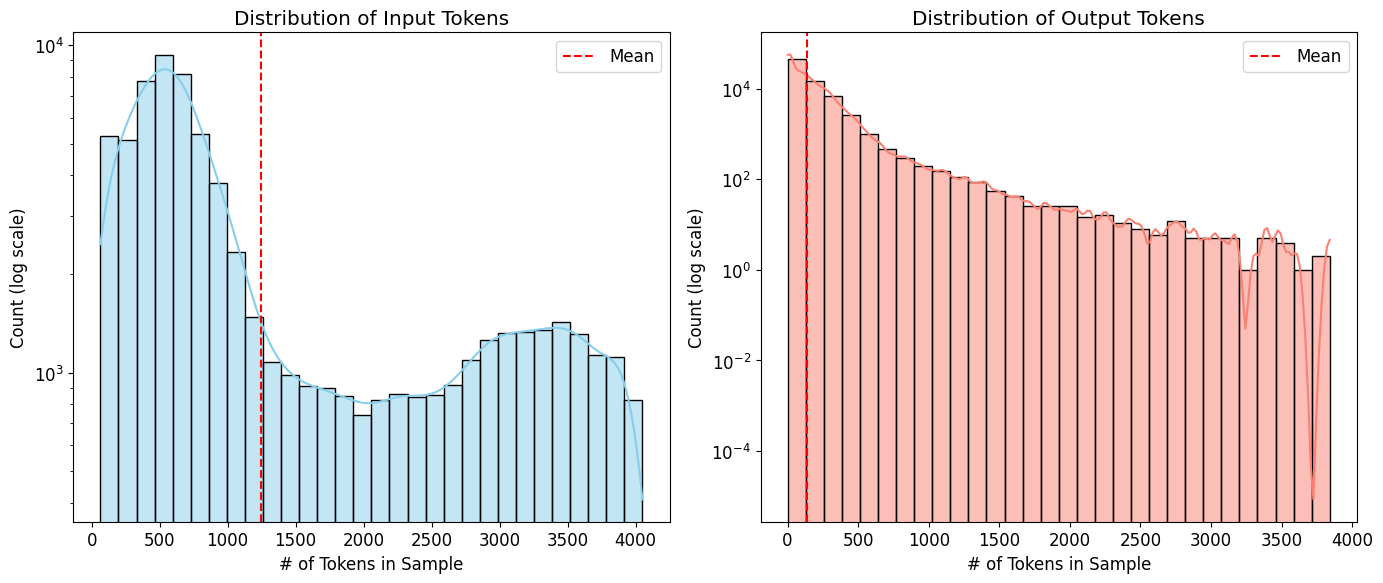

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_tokens is already loaded with 'Input Tokens' and 'Output Tokens' columns
plt.figure(figsize=(14, 6))  # Wider figure to accommodate two subplots side by side

# Font settings
plt.rcParams.update({'font.size': 12, 'font.family': 'Inconsolata'})

# Input Tokens Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_tokens['Input Tokens'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Input Tokens')
plt.xlabel('# of Tokens in Sample')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.axvline(df_tokens['Input Tokens'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# Output Tokens Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_tokens['Output Tokens'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Output Tokens')
plt.xlabel('# of Tokens in Sample')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.axvline(df_tokens['Output Tokens'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

plt.tight_layout()
plt.show()

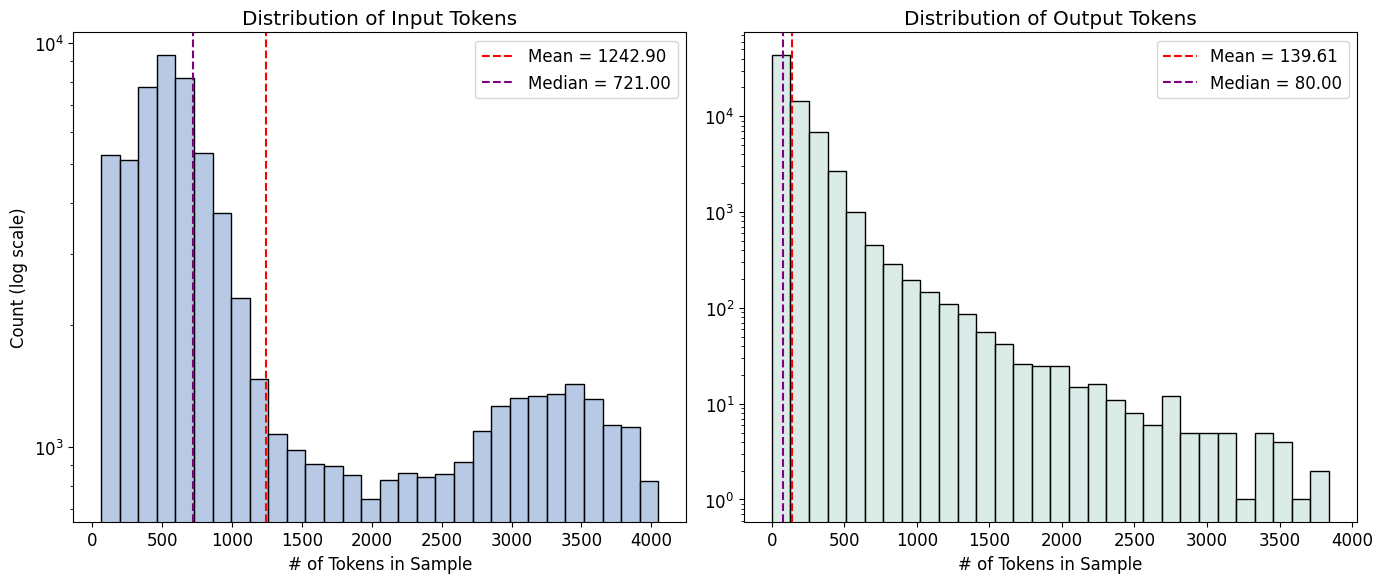

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6)) 

plt.rcParams.update({'font.size': 12, 'font.family': 'Sans Serif'})

# Input Tokens Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_tokens['Input Tokens'], bins=30, kde=False, color='#9FB7DC')  # Using Hex code for color
plt.title('Distribution of Input Tokens')
plt.xlabel('# of Tokens in Sample')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.axvline(df_tokens['Input Tokens'].mean(), color='red', linestyle='--', label=f'Mean = {df_tokens["Input Tokens"].mean():.2f}')
plt.axvline(df_tokens['Input Tokens'].median(), color='purple', linestyle='--', label=f'Median = {df_tokens["Input Tokens"].median():.2f}')
plt.legend()

# Output Tokens Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_tokens['Output Tokens'], bins=30, kde=False, color='#D0E5DF')  # Using Hex code for color
plt.title('Distribution of Output Tokens')
plt.xlabel('# of Tokens in Sample')


plt.yscale('log')
plt.axvline(df_tokens['Output Tokens'].mean(), color='red', linestyle='--', label=f'Mean = {df_tokens["Output Tokens"].mean():.2f}')
plt.axvline(df_tokens['Output Tokens'].median(), color='purple', linestyle='--', label=f'Median = {df_tokens["Output Tokens"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Get dataset stats. Run this once and cache it.

import datasets

from tasks.task import TaskCollection
from copy import deepcopy
from concurrent.futures import ProcessPoolExecutor
from pathlib import Path
import pandas as pd

def get_stats(task):
    "Get stats for a single task."
    metadata = deepcopy(task.metadata)
    res = {"name": task.name}
    metadata["domains"] = " | ".join(metadata["domains"])
    del metadata["contributor"]
    res.update(metadata)
    ds = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096", task.name)
    counts = {"n_train": ds["train"].num_rows,
              "n_validation": ds["validation"].num_rows,
              "n_test": ds["test"].num_rows}

    # Just look at train token counts
    toks_input = ds["train"]["_input_toks"]
    toks_output = ds["train"]["_output_toks"]

    counts["total_toks_input"] = int(pd.Series(toks_input).sum())
    counts["total_toks_output"] = int(pd.Series(toks_output).sum())
    counts["total_toks"] = counts["total_toks_input"] + counts["total_toks_output"]
    counts["median_toks_input"] = int(pd.Series(toks_input).median())
    counts["median_toks_output"] = int(pd.Series(toks_output).median())
    counts["mean_toks_input"] = float(pd.Series(toks_input).mean())
    counts["mean_toks_output"] = float(pd.Series(toks_output).mean())
    res.update(counts)

    return res

# Make stats file, or load if already done.
stats_file = Path("results/stats.tsv")
if stats_file.exists():
    df = pd.read_table(stats_file)
else:
    tc = TaskCollection()
    workers = 20
    stats_file.parent.mkdir(exist_ok=True)
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = list(executor.map(get_stats, tc.tasks.values()))
        df = pd.DataFrame(res).set_index("name").sort_index()
        df.to_csv(stats_file, sep="\t")


In [ ]:
ds = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096", "scierc_ner")['train']

In [ ]:
ds['_input_toks']

In [ ]:
# Flatten all the sub datasets and get all the isinstances:


In [3]:
import datasets

from tasks.task import TaskCollection
from copy import deepcopy
from concurrent.futures import ProcessPoolExecutor
from pathlib import Path
import pandas as pd

def get_stats(task):
    "Get stats for a single task."
    metadata = deepcopy(task.metadata)
    res = {"name": task.name}
    metadata["domains"] = " | ".join(metadata["domains"])
    del metadata["contributor"]
    res.update(metadata)
    ds = datasets.load_dataset("ai2-adapt-dev/science-adapt-4096", task.name)
    counts = {"n_train": ds["train"].num_rows,
              "n_validation": ds["validation"].num_rows,
              "n_test": ds["test"].num_rows}

    # Just look at train token counts
    toks_input = ds["train"]["_input_toks"]
    toks_output = ds["train"]["_output_toks"]

    counts["total_toks_input"] = int(pd.Series(toks_input).sum())
    counts["total_toks_output"] = int(pd.Series(toks_output).sum())
    counts["total_toks"] = counts["total_toks_input"] + counts["total_toks_output"]
    counts["median_toks_input"] = int(pd.Series(toks_input).median())
    counts["median_toks_output"] = int(pd.Series(toks_output).median())
    counts["mean_toks_input"] = float(pd.Series(toks_input).mean())
    counts["mean_toks_output"] = float(pd.Series(toks_output).mean())
    res.update(counts)

    return res

stats_file = Path("results/stats.tsv")

tc = TaskCollection()
stats_file.parent.mkdir(exist_ok=True)
results = [get_stats(task) for task in tc.tasks.values()]
df = pd.DataFrame(results).set_index("name").sort_index()
df.to_csv(stats_file, sep="\t")

In [9]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 12})

def make_pie_charts(df, field):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.ravel()
    task_counts = df[field].value_counts().sort_index()
    task_counts.plot.pie(ax=axs[0], autopct=lambda p: '{:.0f}'.format(p * sum(task_counts) / 100))
    axs[0].set_title("Number of tasks")

    # inst_counts = df.groupby(field)["n_train"].sum().sort_index()
    # inst_counts.plot.pie(ax=axs[1], autopct=lambda p: '{:.0f}'.format(p * sum(inst_counts) / 100))
    # axs[1].set_title("Number of train instances")

    # Change the code above to report all instances, not just train set

    df['total_instances'] = df['n_train'] + df.get('n_test', 0) + df.get('n_validation', 0)
    total_inst_counts = df.groupby(field)["total_instances"].sum().sort_index()
    total_inst_counts.plot.pie(ax=axs[1], autopct=lambda p: '{:.0f}'.format(p * sum(total_inst_counts) / 100), ylabel='')
    axs[1].set_title("Total number of instances")
  


    tok_counts = df.groupby(field)["total_toks"].sum().sort_index()
    print("Token counts:")
    print(tok_counts)
    # The total token counts can be really unbalanced; truncate the largest one so it's
    # the size of the rest combined.
    # Calculate the sum of all values except the largest one
    sum_except_max = tok_counts.sum() - tok_counts.max()
    # # Replace the largest value with this sum
    tok_counts.loc[tok_counts.idxmax()] = sum_except_max
    tok_counts.plot.pie(ax=axs[2], autopct=lambda p: '{:.2e}'.format(p * sum(tok_counts) / 100))
    axs[2].set_title("Number of train tokens (input + output).")

    axs[3].axis("off")

    fig.suptitle(field)
    fig.tight_layout()

## Aggregate statistics

Total number of instances and tokens below.

In [2]:
df
df['n_total'] = df['n_train'] + df['n_validation'] + df['n_test']

df 

NameError: name 'df' is not defined

In [48]:
df['major_task'] = df['task'].str.split('.').str[0]

# Grouping by the major task category and calculating the mean of medians
result = df.groupby('major_task')[['median_toks_input', 'median_toks_output']].mean()


In [49]:
result

,median_toks_input,median_toks_output
major_task,,
classification,406.500000,2.750000
entailment,635.666667,65.666667
ie,880.440000,182.120000
qa,1368.181818,56.636364
summarization,2271.181818,211.363636


In [50]:
result2 = df.groupby('major_task')[['median_toks_input', 'median_toks_output']].median()
result2

,median_toks_input,median_toks_output
major_task,,
classification,423.5,2.5
entailment,626.0,63.0
ie,602.0,101.0
qa,558.0,17.0
summarization,2766.0,167.0


In [22]:
df[
    [
        "n_train",
        "n_validation",
        "n_test",
        "total_toks_input",
        "total_toks_output",
        "total_toks",
    ]
].sum().apply(lambda x: f"{x:,}")

n_train                  70,521
n_validation             30,736
n_test                   35,875
total_toks_input     87,650,438
total_toks_output     9,845,090
total_toks           97,495,528
dtype: object

## Task type statistics

Number of tasks per task type, and number of train instances per task type. There are lot of summarization instances because it's easy to get weakly-supervised data (e.g. use abstracts as summaries of papers, papers summaries on OpenReview, etc).

NOTE: token counts are very imbalanced (summarization has much more tokens than every other task), so in the plot I truncate the largest token count to be the sum of the token counts for the remaining gruops for easy of visualization.

Token counts:
major_category
classification     3771409
entailment         3024619
ie                16758100
qa                13597329
summarization     60344071
Name: total_toks, dtype: int64


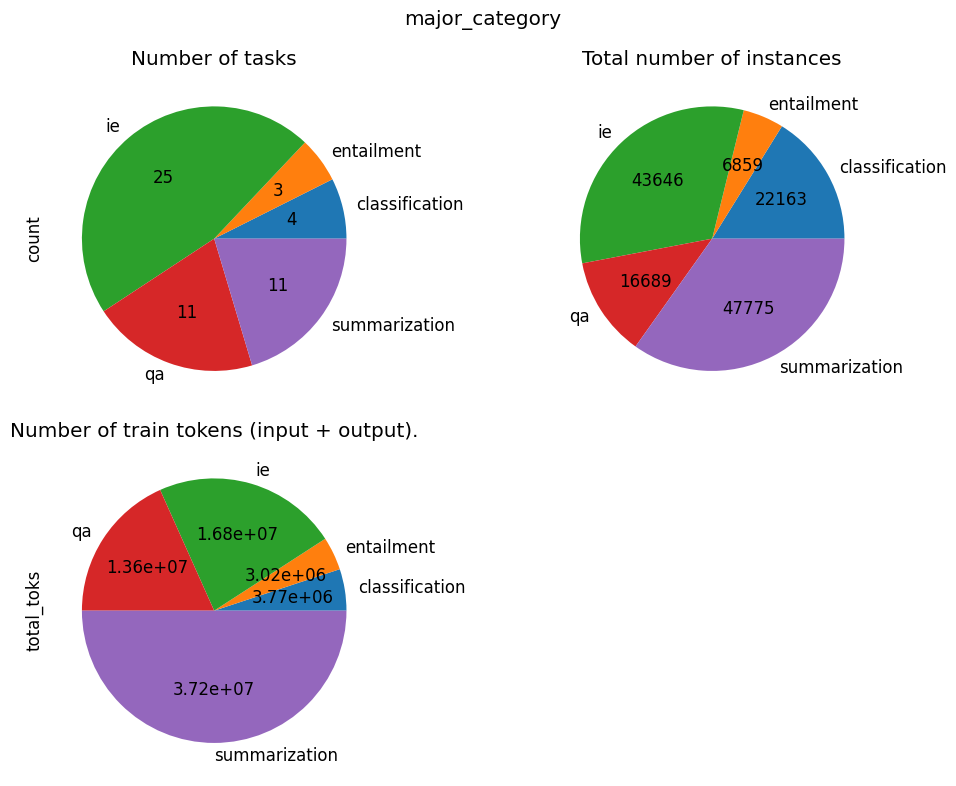

In [10]:
from matplotlib import pyplot as plt

df["major_category"] = [x.split(".")[0] for x in df["task"]]
make_pie_charts(df, "major_category")


## Domain statistics

Note that some tasks can be associated with multiple domains, so there's some double-counting here. It's fairly heavy on biomed, but there's a good amount of AI instances as well.

Based on this, maybe we should combine chemistry and materials science?

Token counts:
domain
artificial_intelligence    32232414
biomedicine                40620301
chemistry                   8178058
clinical_medicine          19879782
materials_science           3830924
misc                       10247547
Name: total_toks, dtype: int64


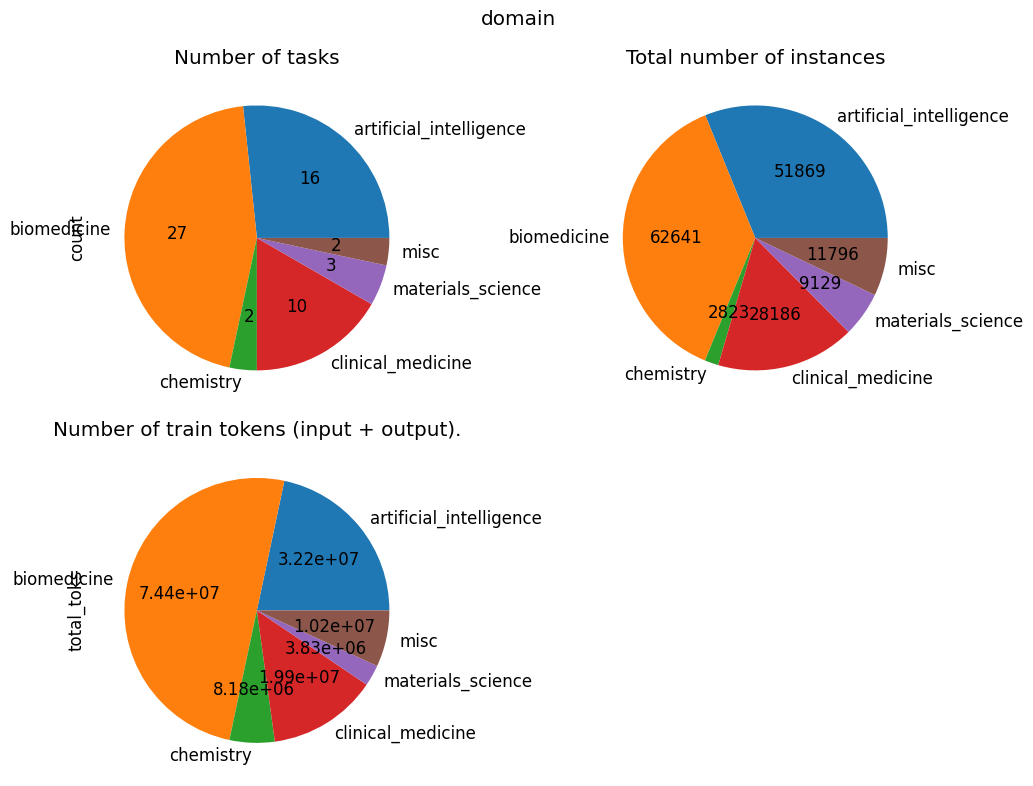

In [11]:
domain_df = []

for _, row in df.iterrows():
    domains = row["domains"].split(" | ")
    for domain in domains:
        domain_df.append({"domain": domain, "n_train": row["n_train"], "n_validation": row["n_validation"], "n_test": row["n_test"],
                           "total_toks": row["total_toks"]})

domain_df = pd.DataFrame(domain_df)

make_pie_charts(domain_df, "domain")


In [25]:
# print mean token counts computed above
print(df[["mean_toks_input", "mean_toks_output"]].mean())

mean_toks_input     1227.945835
mean_toks_output     159.293099
dtype: float64


## Input and output context

The types of input and output expected by the model. Interestingly, the majority of the tasks require `json` output. This happens for both IE tasks, as well as tasks like QA and entailment that require some kind of rationale justifying their answer.

Token counts:
input_context
multiple_paragraphs    60567557
paragraph              35935255
sentence                 309562
structured               683154
Name: total_toks, dtype: int64


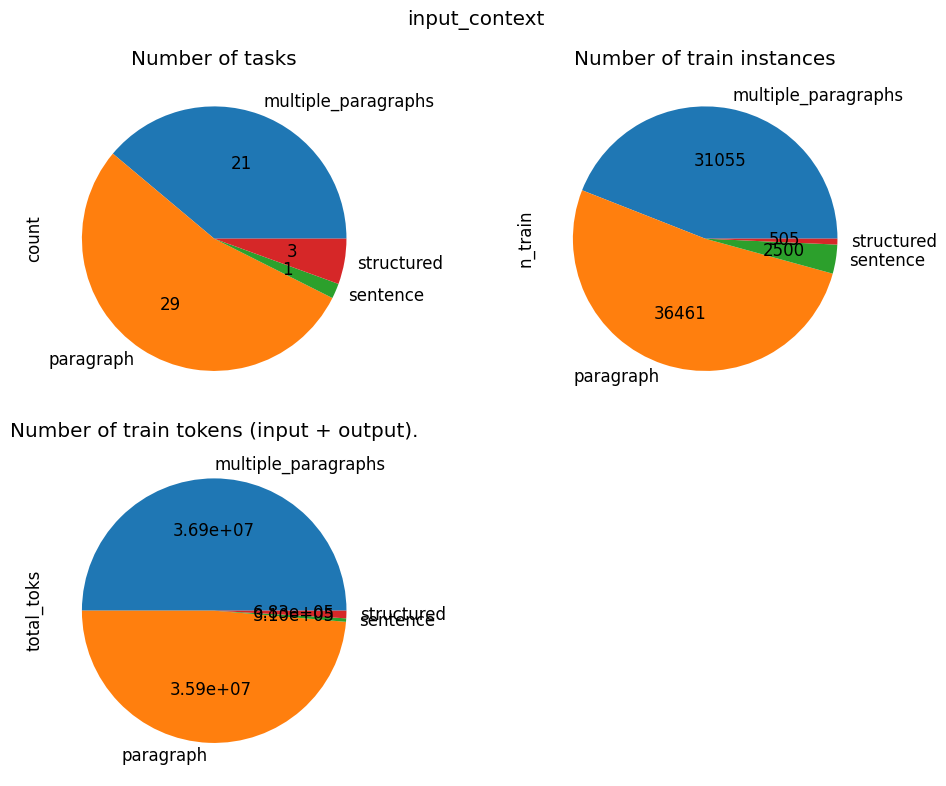

In [26]:
make_pie_charts(df, "input_context")


Token counts:
output_context
json         26503382
jsonlines      683154
label         3092983
paragraph    57701762
sentence      9514247
Name: total_toks, dtype: int64


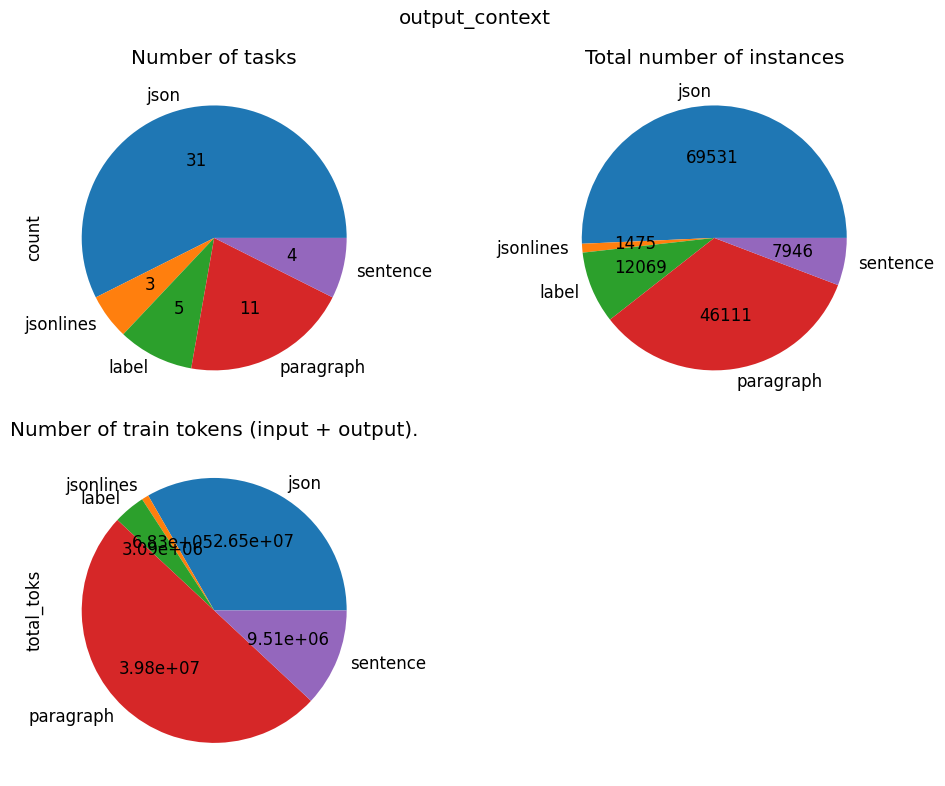

In [12]:
make_pie_charts(df, "output_context")


## Distribution of instances per task

Histograms showing the number of instances per task, across folds. The long tail at 10k is mostly summarization tasks for which we have essentially unlimited data.

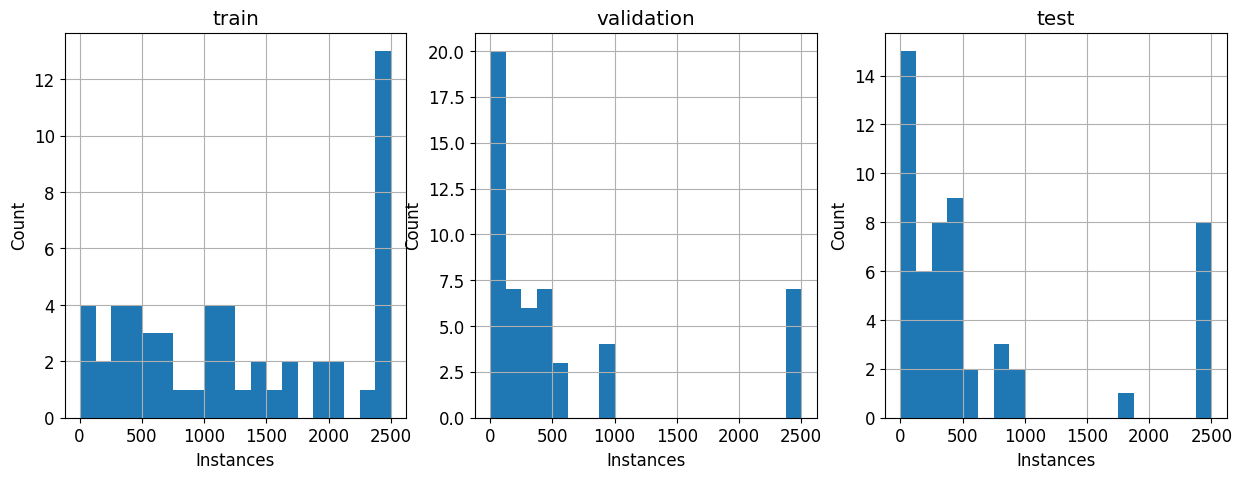

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for split, ax in zip(["train", "validation", "test"], axs):
    df[f"n_{split}"].hist(ax=ax, bins=20)
    ax.set_xlabel("Instances")
    ax.set_ylabel("Count")
    ax.set_title(split)


## Instance length distribution

Distribution of median input and output length, in tokens (using llama-2 tokenizer).

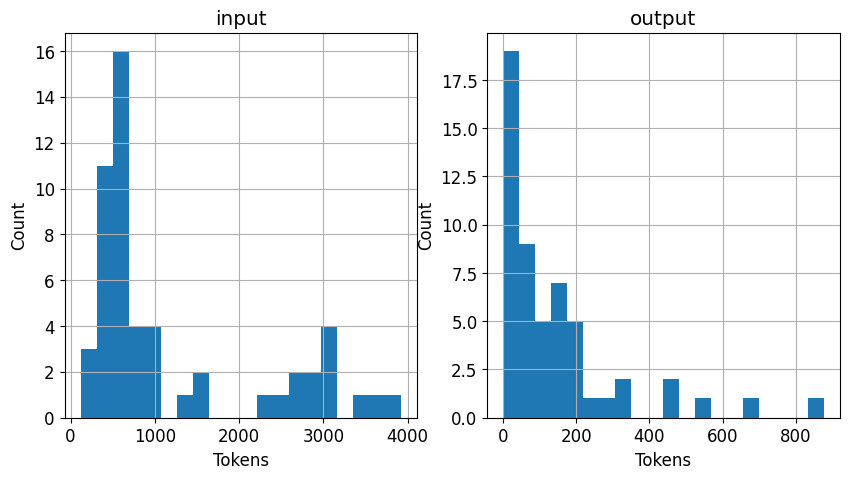

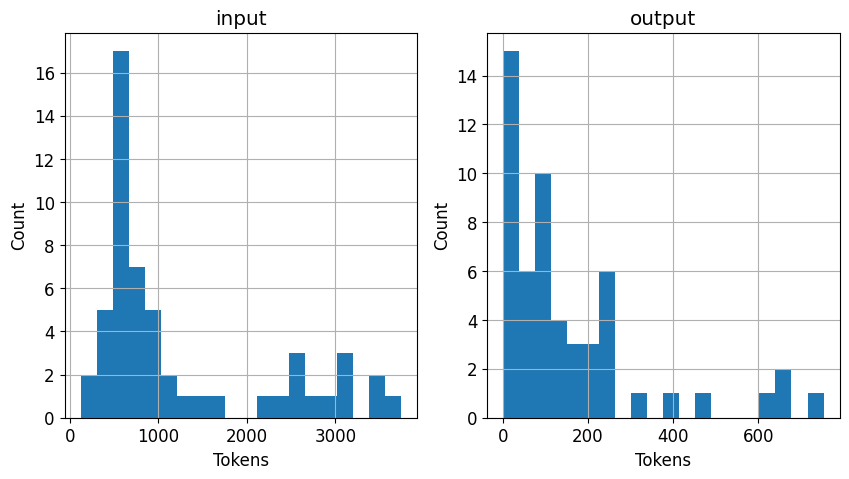

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for name, ax in zip(["input", "output"], axs):
    # Clip very long tasks.
    upper = 8096 if name == "input" else 1000
    df[f"median_toks_{name}"].clip(upper=100000).hist(ax=ax, bins=20)
    ax.set_xlabel("Tokens")
    ax.set_ylabel("Count")
    ax.set_title(name)

# Mean token

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for name, ax in zip(["input", "output"], axs):
    # Clip very long tasks.
    upper = 8096 if name == "input" else 1000
    df[f"mean_toks_{name}"].clip(upper=upper).hist(ax=ax, bins=20)
    ax.set_xlabel("Tokens")
    ax.set_ylabel("Count")
    ax.set_title(name)


## Full list of tasks

In [30]:
fields_to_show = [ "domains", "task", "source_type", "input_context", "output_context", "n_train"]
df[fields_to_show].sort_values(["domains", "task"])

,domains,task,source_type,input_context,output_context,n_train
name,,,,,,
acl_arc_intent_classification,artificial_intelligence,classification,single_source,multiple_paragraphs,label,1688
multicite_intent_classification,artificial_intelligence,classification,single_source,paragraph,json,2500
scicite_classification,artificial_intelligence,classification,single_source,paragraph,label,2500
scierc_ner,artificial_intelligence,ie.named_entity_recognition,single_source,paragraph,json,346
scierc_re,artificial_intelligence,ie.relation_extraction,single_source,paragraph,json,346
mltables_te,artificial_intelligence,ie.structure_to_json,single_source,structured,jsonlines,25
qasa_abstractive_qa,artificial_intelligence,qa.abstractive,single_source,multiple_paragraphs,paragraph,932
qasper_abstractive_qa,artificial_intelligence,qa.abstractive,single_source,multiple_paragraphs,json,206
qasper_extractive_qa,artificial_intelligence,qa.extractive,single_source,multiple_paragraphs,json,709


In [ ]:
# For each task type (the key is "task"), get the mean token counts for input and output

df.groupby("task")[["mean_toks_input", "mean_toks_output"]].mean()

In [ ]:
df2.head()

In [36]:
plt.rcParams.update({'font.size': 15, 'font.family': 'Sans Serif'})